<a href="https://colab.research.google.com/github/AshvinVignesh/Spam-Mail-Detection/blob/main/SPAM_MAIL_CW_(DecisionTree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
headers = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

df = pd.read_csv('spambase.data', header=None, names=headers)

In [43]:
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [44]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              

In [45]:
df.dropna()
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [46]:
df.shape

(4601, 58)

**TRAIN SPLIT**

In [101]:
X = df.drop(columns=['class'])
y= df['class'].values

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [104]:
X = pd.DataFrame( data = scaled_data , columns =X.columns)

In [23]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=5)
principle_components =pca.fit_transform(X)

In [109]:
X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4','PC5'])
X.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.731748,-0.043385,-0.564741,0.259106,-0.171651
1,-1.185084,2.067963,0.033358,-0.442813,-0.280739
2,-1.467596,5.023022,3.319501,-0.932807,0.701269
3,-0.805348,0.427532,-0.579922,0.043752,-0.094891
4,-0.806279,0.426776,-0.581934,0.043713,-0.094981


Text(0.5, 1.0, 'scree plot')

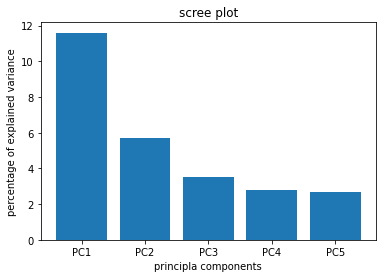

In [110]:
per_var =np.round(pca.explained_variance_ratio_ * 100 , decimals=1)
label = ['PC' + str(x) for x in range(1,len(per_var) + 1 )]
plt.bar(x=range(1,len(per_var)+1),height = per_var , tick_label = label)
plt.ylabel("percentage of explained variance")
plt.xlabel('principla components')
plt.title('scree plot')

In [91]:
# pca = PCA(n_components= 4)
# principle_components = pca.fit_transform(X)

In [93]:
# X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4'])


In [10]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [184]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5 , random_state= 42)

In [185]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [186]:
prediction = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       804
           1       0.86      0.88      0.87       577

    accuracy                           0.89      1381
   macro avg       0.89      0.89      0.89      1381
weighted avg       0.89      0.89      0.89      1381



In [188]:
print(confusion_matrix(y_test,prediction))

[[724  80]
 [ 70 507]]


**ACCURACY**

In [121]:
from sklearn.metrics import accuracy_score

In [189]:
y_pred=dtree.predict(X_test)
acc =accuracy_score(y_test,y_pred)
print(acc*100)

89.1383055756698
